# 1. Import

## 1.1. Import packages

- numpy and pandas is what we'll use to manipulate our data
- matplotlib.pyplot and seaborn will be used to produce plots for visualization
- util will provide the locally defined utility functions that have been provided for this assignment We will also use several modules from the keras framework for building deep learning models.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
path = "../dataset/chest_xray/chest_xray/"
os.listdir(path)

['.DS_Store', 'test', 'train', 'val']

In [3]:
len(os.listdir(path + '/train/pneumonia'))

3876

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# 2. EDA

## 2.1. Data analysis

In [4]:
def visualize_data_analysis(name):
    # Print info
    dir = path
    full_dir = dir + name

    print(f"In {name} set:\n========================================")
    
    num_pneumonia = len(os.listdir(os.path.join(full_dir, 'PNEUMONIA')))

    num_normal = len(os.listdir(os.path.join(full_dir, 'NORMAL')))
    print(f"PNEUMONIA={num_pneumonia}")
    print(f"NORMAL={num_normal}")

    # Plot bar plot
    categories = ['PNEUMONIA', 'NORMAL']
    values = [num_pneumonia, num_normal]

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Create the bar plot using seaborn
    sns.barplot(x=categories, y=values)

    # Add annotation text above each bar
    for i, v in enumerate(values):
        plt.text(i, v , str(v), ha='center', va='bottom')

    # Set the plot title and labels
    plt.title('Pneumonia vs Normal')
    plt.xlabel('Categories')
    plt.ylabel('Count')

    # Display the plot
    plt.show()

In train set:
PNEUMONIA=3876
NORMAL=1342


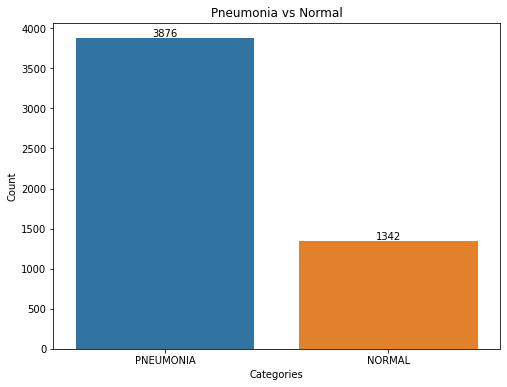

In [5]:
visualize_data_analysis('train')

In test set:
PNEUMONIA=390
NORMAL=234


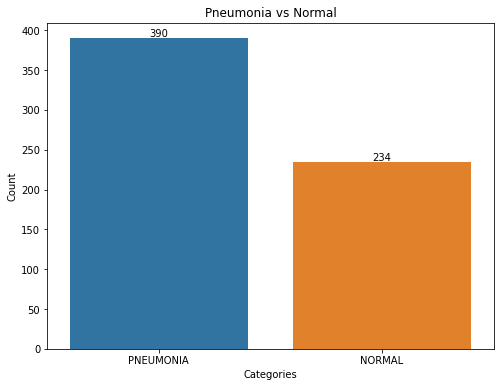

In [6]:
visualize_data_analysis('test')

In val set:
PNEUMONIA=9
NORMAL=9


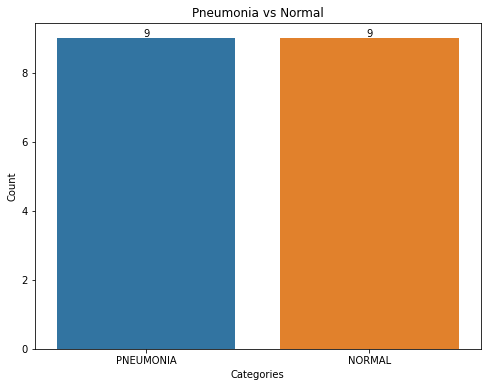

In [7]:
visualize_data_analysis('val')

**Preview images in both class**

In [8]:
# Get random image use plt
def get_image(dir, label):
    dir = f'{path}{dir}/{label}/'
    list_dir = os.listdir(dir)

    rand = np.random.randint(0,len(list_dir))

    img = plt.imread(os.path.join(dir, list_dir[rand]))
    return img

In [9]:
def show_preview(dir, label):
    plt.figure(figsize=(8, 8))
    img = get_image(dir, label)
    plt.imshow(img, cmap='gray')
    plt.title(label)

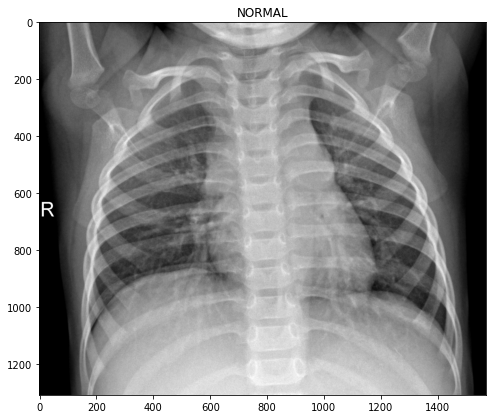

In [10]:
show_preview('train', 'NORMAL')

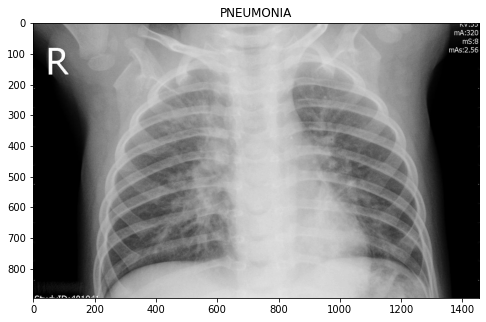

In [11]:
show_preview('train', 'PNEUMONIA')

## 2.2. Investigate pixel value distribution

- Check random image in NORMAL of train 
    - Size
    - min, max value of pixel
    - Mean pixel, SD of pixel


In [12]:
def check_size_random():
    sample_img = get_image('train', 'NORMAL')
    plt.imshow(sample_img, cmap='gray')
    plt.colorbar()
    plt.title('Raw Chest X Ray Image')

    print(f" Image size = {sample_img.shape[0]} x {sample_img.shape[1]} (width x height) (in pixels), one single color channel.")
    print(f" About pixel value: Max = {sample_img.max():.2f},  Min = {sample_img.min():.2f}")
    print(f" Mean value of the pixels = {sample_img.mean():.2f} \n The standard deviation = {sample_img.std():.2f}")

 Image size = 908 x 1148 (width x height) (in pixels), one single color channel.
 About pixel value: Max = 255.00,  Min = 0.00
 Mean value of the pixels = 115.95 
 The standard deviation = 62.16


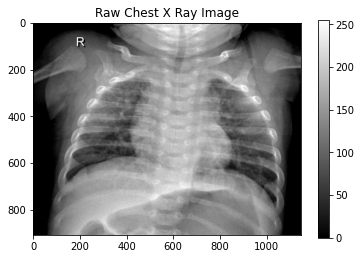

In [13]:
check_size_random()

 Image size = 1560 x 1568 (width x height) (in pixels), one single color channel.
 About pixel value: Max = 255.00,  Min = 0.00
 Mean value of the pixels = 133.48 
 The standard deviation = 65.64


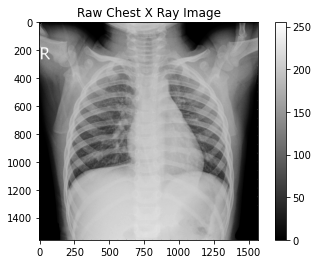

In [14]:
check_size_random()

->**Different images have different size**

In [17]:
# Ivestigate pixel value distribution of random image in NORMAL of train
def pixel_distribution():
    sample_img = get_image('train', 'NORMAL')
    sns.displot(sample_img.ravel(),
                label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
    plt.legend(loc='upper center')
    plt.title('Distribution of Pixel Intensities in the Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('# Pixels in Image')

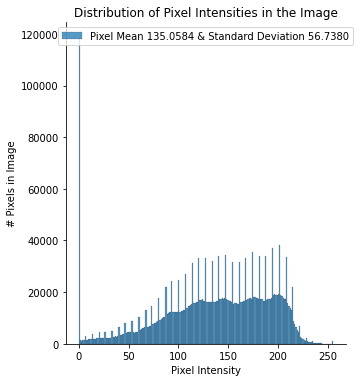

In [18]:
pixel_distribution()
plt.show()